In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import pandas as pd
import os
import cv2

https://colab.research.google.com/drive/1E1PDOspqS6I0m2iQ_hgAaCGSAr3Pbhrc#scrollTo=Gzb9JRFvQxOS

## Part 1: Data Preprocessing

### Load Data

In [16]:
# 設定資料路徑

# training data path
trcloudy="weather_image/train/cloudy/"
trrain="weather_image/train/rain/"
trshine="weather_image/train/shine/"
trsunrise="weather_image/train/sunrise/"

# testing data path
testpath="weather_image/test/"

In [17]:
# 顯示資料筆數
print('train cloudy length: ',len(os.listdir(trcloudy)))
print('train rain length: ',len(os.listdir(trrain)))
print('train shine length: ',len(os.listdir(trshine)))
print('train sunrise length: ',len(os.listdir(trsunrise)))
print('\n')
print('test data length: ',len(os.listdir(testpath)))

train cloudy length:  280
train rain length:  199
train shine length:  232
train sunrise length:  337


test data length:  75


### convert image data to numpy

In [18]:
# convert the train data to numpy
tr_label=list()
tr_data=np.empty(shape=(1048,300,300,3))
x=0
for i in range(len(os.listdir(trcloudy))):
  f=os.listdir(trcloudy)[i]
  img=cv2.imread(trcloudy+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(0)
  x+=1
for i in range(len(os.listdir(trrain))):
  f=os.listdir(trrain)[i]
  img=cv2.imread(trrain+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(1)
  x+=1
for i in range(len(os.listdir(trshine))):
  f=os.listdir(trshine)[i]
  img=cv2.imread(trshine+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(2)
  x+=1
for i in range(len(os.listdir(trsunrise))):
  f=os.listdir(trsunrise)[i]
  img=cv2.imread(trsunrise+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(3)
  x+=1

tr_label=np.array(tr_label)

In [19]:
# convert the test data to numpy
te_filename=list()
te_data=np.empty(shape=(75,300,300,3))
for i in range(len(os.listdir(testpath))):
  f=os.listdir(testpath)[i]
  te_filename.append(f)
  img=cv2.imread(testpath+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  te_data[i]=img

In [20]:
# show data size
print('train data size:',tr_data.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (1048, 300, 300, 3)
train label size: 1048
test data size: (75, 300, 300, 3)


### shuffle

In [21]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)

# 打亂資料順序
from sklearn.utils import shuffle
tr_data,tr_label=shuffle(tr_data,tr_label,random_state=0)

### train_validation data split

In [23]:
# train_validation data split

#val_data數量固定262個

train_data=tr_data[0:786]
val_data=tr_data[786:]
train_label=tr_label[0:786]
val_label=tr_label[786:]
print('train data size: ',train_data.shape)
print('validation data size: ',val_data.shape)
print('train label size: ',train_label.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 300, 300, 3)
validation data size:  (262, 300, 300, 3)
train label size:  (786, 4)
validation label size:  (262, 4)


### Data augmentation

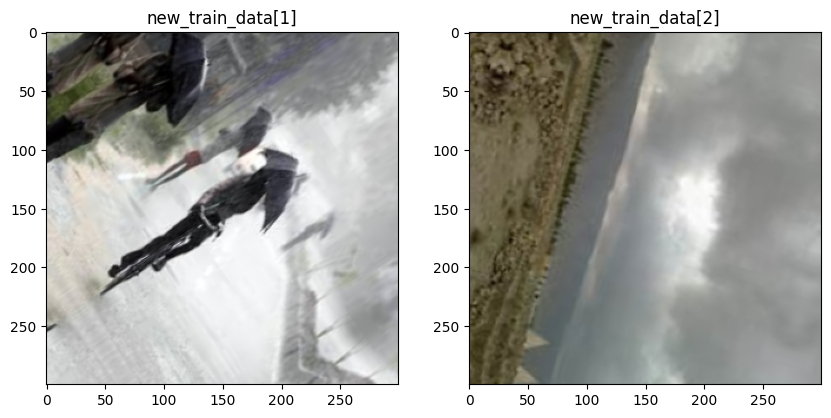

In [33]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

new_train_data = np.empty(shape=(786,300,300,3))
for i in range(len(train_data)):
  data = data_augmentation(train_data[i])
  new_train_data[i] = data

new_val_data = np.empty(shape=(262,300,300,3))
for i in range(len(val_data)):
  data = data_augmentation(val_data[i])
  new_val_data[i] = data

fig = plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.title('new_train_data[1]')
plt.imshow(new_train_data[1])

plt.subplot(1, 2, 2)
plt.title('new_train_data[2]')
plt.imshow(new_train_data[2])

plt.show()

In [11]:
print('new train data shape: ', new_train_data.shape)
print('new validation data shape: ', new_val_data.shape)

new train data shape:  (786, 300, 300, 3)
new validation data shape:  (262, 300, 300, 3)


# Part 2：Build a simple CNN

In [24]:
# 建立一個 CNN　模型
cnn = tf.keras.Sequential([

    # Convolution & Pooling Layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(300,300,3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    # tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    # tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    # neron network
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=32,activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=4,activation='softmax')
])

# 顯示模型結構
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 150, 150, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 150, 150, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 75, 75, 64)       

In [25]:
# comiple model
cnn.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# # Data Augmentation
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # 以每一張feature map為單位將平均值設為0
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # 以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
#         samplewise_std_normalization=False,  #  將输入的每個樣本除以其自身的標準差。
#         zca_whitening=False,  # dimesion reduction
#         rotation_range=0.1,  # 隨機旋轉圖片
#         zoom_range = 0.1, #  隨機縮放範圍
#         width_shift_range=0.1,  #  水平平移，相對總寬度的比例
#         height_shift_range=0.1,  # 垂直平移，相對總高度的比例
#         horizontal_flip=False,  # 一半影象水平翻轉
#         vertical_flip=False)  # 一半影象垂直翻轉

# datagen.fit(x_train)

In [44]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# save the best weights
# checkpointer = ModelCheckpoint(filepath="助教課/fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [26]:
history = cnn.fit(train_data, train_label, batch_size=50 , epochs=100, validation_split=0.3)

Epoch 1/100
11/11 [==============================] - 75s 5s/step - loss: 2.0011 - accuracy: 0.3636 - val_loss: 1.1059 - val_accuracy: 0.6398
Epoch 2/100
11/11 [==============================] - 50s 5s/step - loss: 0.9788 - accuracy: 0.5564 - val_loss: 0.8639 - val_accuracy: 0.7458
Epoch 3/100
11/11 [==============================] - 49s 4s/step - loss: 0.8144 - accuracy: 0.6545 - val_loss: 0.7181 - val_accuracy: 0.8051
Epoch 4/100
11/11 [==============================] - 50s 5s/step - loss: 0.6378 - accuracy: 0.7545 - val_loss: 0.6263 - val_accuracy: 0.7839
Epoch 5/100
11/11 [==============================] - 49s 5s/step - loss: 0.5855 - accuracy: 0.7673 - val_loss: 0.5908 - val_accuracy: 0.7754
Epoch 6/100
11/11 [==============================] - 49s 5s/step - loss: 0.5377 - accuracy: 0.8018 - val_loss: 0.5116 - val_accuracy: 0.8136
Epoch 7/100
11/11 [==============================] - 50s 5s/step - loss: 0.5073 - accuracy: 0.7945 - val_loss: 0.4696 - val_accuracy: 0.8729
Epoch 8/100
1

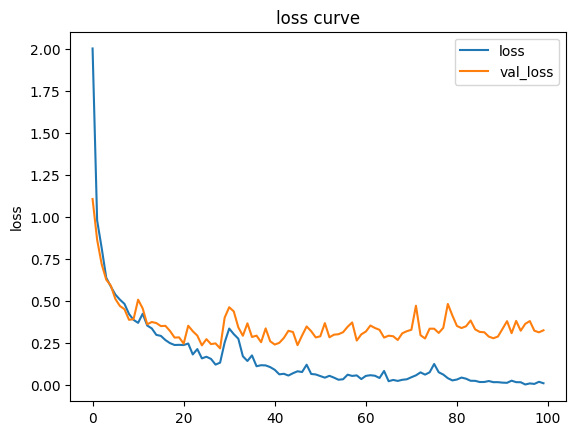

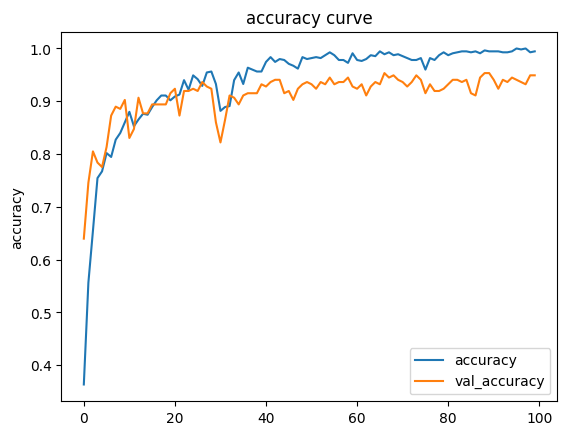

In [27]:
# plot loss curve & accuracy curve

# loss curve
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()

# accuracy curve
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Plot the confusion matrix & classification report

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn


pre=cnn.predict(val_data)
pre=np.argmax(pre,axis=1)

cr = classification_report(pre, np.argmax(val_label,axis=1))
print(cr)

9/9 [==============================] - 5s 484ms/step
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        67
           1       0.98      0.85      0.91        48
           2       0.91      0.84      0.87        62
           3       0.98      0.99      0.98        85

    accuracy                           0.93       262
   macro avg       0.93      0.92      0.92       262
weighted avg       0.93      0.93      0.93       262



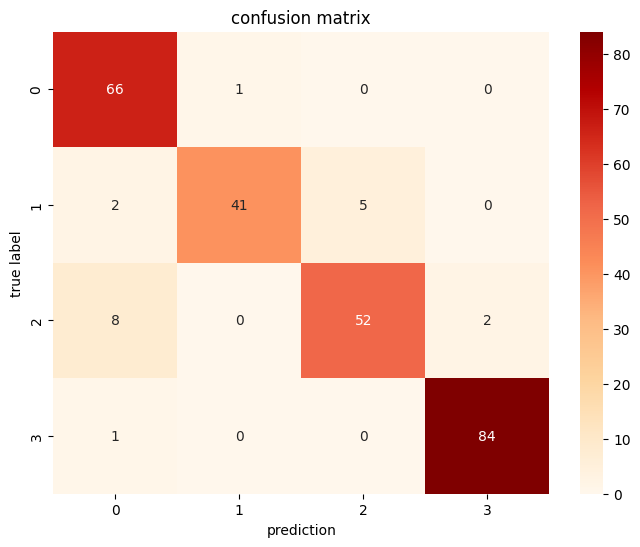

In [29]:
cm=confusion_matrix(pre, np.argmax(val_label,axis=1))
fit=plt.figure(figsize=(8,6))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

# Part 3:Output the csv file

In [30]:
import pandas as pd

In [31]:
prediction=cnn.predict(te_data)
prediction=np.argmax(prediction,axis=1)
prediction

3/3 [==============================] - 1s 386ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 0, 0], dtype=int64)

In [39]:
test_label=pd.DataFrame()
test_label['image_id']=te_filename
test_label['labels']=prediction
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('weather_image/predict_label.csv',index=False) #結果轉csv檔